In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
from random import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import jaccard_similarity_score
from math import *
from decimal import Decimal 
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
import math
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from kmodes.kmodes import KModes

path = "./kModesData.csv"

In [2]:
data = pd.read_csv(path)

## K-modes algorithm

In [3]:
keys = data.columns
for key in keys:
    data[key] = data[key].astype(int)

In [36]:
count = 0
flag = False
for columnName in data.columns:
    if(not flag):
        count = len(data.groupby(columnName).size())
        flag = True
    else:
        count*= len(data.groupby(columnName).size())
        
    print(columnName,len(data.groupby(columnName).size()),count)

ELECTRODOMESTICOS 20 20
ESTU_GENERO 2 40
ESTU_FECHANACIMIENTO 9 360
PERIODO 2 720
ESTU_DEPTO_RESIDE 34 24480
FAMI_ESTRATOVIVIENDA 7 171360
FAMI_PERSONASHOGAR 5 856800
FAMI_CUARTOSHOGAR 6 5140800
FAMI_EDUCACIONPADRE 12 61689600
FAMI_EDUCACIONMADRE 12 740275200
FAMI_TRABAJOLABORPADRE 13 9623577600
FAMI_TRABAJOLABORMADRE 13 125106508800
FAMI_NUMLIBROS 4 500426035200
FAMI_COMELECHEDERIVADOS 4 2001704140800
FAMI_COMECARNEPESCADOHUEVO 4 8006816563200
FAMI_COMECEREALFRUTOSLEGUMBRE 4 32027266252800
ESTU_DEDICACIONLECTURADIARIA 5 160136331264000
ESTU_DEDICACIONINTERNET 5 800681656320000
COLE_NATURALEZA 2 1601363312640000
COLE_CARACTER 4 6405453250560000
COLE_AREA_UBICACION 2 12810906501120000
COLE_JORNADA 6 76865439006720000
PUNT_LECTURA_CRITICA 9 691788951060480000
PUNT_MATEMATICAS 10 6917889510604800000
PUNT_C_NATURALES 9 62261005595443200000
PUNT_SOCIALES_CIUDADANAS 10 622610055954432000000
PUNT_INGLES 9 5603490503589888000000
PUNT_GLOBAL 10 56034905035898880000000
ESTU_NSE_ESTABLECIMIENTO 4

In [4]:
def distance(data,cluster):
    arr = list(data)
    similarities = 0
    for i in range(len(arr)):
        if(arr[i]==cluster[i]):
            similarities+=1
    return len(arr)-similarities
def SSW(data,km):
    total = 0
    for i in range(data.shape[0]):
        if(i % 100000 == 0):
            print("%d porciento" %(i/data.shape[0]*100))
        calc = distance(data.iloc[i],kmtmp.cluster_centroids_[km.labels_[i]])
        total += calc*calc
    return total
#distance(data.iloc[0],kmtmp.cluster_centroids_[0])


In [7]:
%%time
kmtmp = KModes(n_clusters=7, init='Huang', verbose=1)

clusterstmp = kmtmp.fit_predict(data)

# Print the cluster centroids
print(kmtmp.cluster_centroids_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 459465, cost: 16000038.0
Run 1, iteration: 2/100, moves: 144437, cost: 15928307.0
Run 1, iteration: 3/100, moves: 49177, cost: 15928307.0
[[   13     1    16 20172     5     2     3     3     9     9     4    12
      2     4     4     2     3     4     2     1     2     2     5     5
      5     5     5     5     2    12     3]
 [   13     1    16 20172     5     2     3     3     9     9    13    12
      1     2     4     2     1     2     2     1     2     2     7     6
      6     6     6     6     2    10     2]
 [    7     0    17 20182     5     1     3     2     9    10    10    12
      1     2     2     1     1     3     2     1     2     2     6     5
      5     4     5     5     2    10     2]
 [    1     0    18 20182     2     1     5     2     8     8     1    12
      1     1     1     1     1     3     2     4     2     2     5     4
      4     4     4    

In [8]:
%%time
total = SSW(data,kmtmp)
total

0 porciento
9 porciento
19 porciento
29 porciento
39 porciento
49 porciento
59 porciento
68 porciento
78 porciento
88 porciento
98 porciento
Wall time: 16min 58s


256511185

In [14]:
columns = ['ELECTRODOMESTICOS', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_NUMLIBROS',
       'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO',
       'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'COLE_NATURALEZA', 'COLE_CARACTER',
       'COLE_AREA_UBICACION', 'COLE_JORNADA', 'PUNT_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
       'PUNT_INGLES', 'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL'
]
for centroid in kmtmp.cluster_centroids_:
    for i in range(len(columns)):
        print(columns[i],":",list(centroid)[i])
    print("..........................")


ELECTRODOMESTICOS : 13
ESTU_GENERO : 1
ESTU_FECHANACIMIENTO : 16
PERIODO : 20172
ESTU_DEPTO_RESIDE : 5
FAMI_ESTRATOVIVIENDA : 2
FAMI_PERSONASHOGAR : 3
FAMI_CUARTOSHOGAR : 3
FAMI_EDUCACIONPADRE : 9
FAMI_EDUCACIONMADRE : 9
FAMI_TRABAJOLABORPADRE : 4
FAMI_TRABAJOLABORMADRE : 12
FAMI_NUMLIBROS : 2
FAMI_COMELECHEDERIVADOS : 4
FAMI_COMECARNEPESCADOHUEVO : 4
FAMI_COMECEREALFRUTOSLEGUMBRE : 2
ESTU_DEDICACIONLECTURADIARIA : 3
ESTU_DEDICACIONINTERNET : 4
COLE_NATURALEZA : 2
COLE_CARACTER : 1
COLE_AREA_UBICACION : 2
COLE_JORNADA : 2
PUNT_LECTURA_CRITICA : 5
PUNT_MATEMATICAS : 5
PUNT_C_NATURALES : 5
PUNT_SOCIALES_CIUDADANAS : 5
PUNT_INGLES : 5
PUNT_GLOBAL : 5
ESTU_NSE_ESTABLECIMIENTO : 2
ESTU_INSE_INDIVIDUAL : 12
ESTU_NSE_INDIVIDUAL : 3
..........................
ELECTRODOMESTICOS : 13
ESTU_GENERO : 1
ESTU_FECHANACIMIENTO : 16
PERIODO : 20172
ESTU_DEPTO_RESIDE : 5
FAMI_ESTRATOVIVIENDA : 2
FAMI_PERSONASHOGAR : 3
FAMI_CUARTOSHOGAR : 3
FAMI_EDUCACIONPADRE : 9
FAMI_EDUCACIONMADRE : 9
FAMI_TRABAJOLABOR

In [5]:
%%time
km = KModes(n_clusters=20, init='Huang', verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 481253, cost: 14694361.0
Run 1, iteration: 2/100, moves: 193924, cost: 14632346.0
Run 1, iteration: 3/100, moves: 50191, cost: 14595971.0
Run 1, iteration: 4/100, moves: 29334, cost: 14588210.0
Run 1, iteration: 5/100, moves: 8968, cost: 14588210.0
[[   13     0    17 20182     5     3     5     3     9     9     4    12
      1     1     2     1     5     2     2     1     2     2     5     5
      5     4     5     5     3    11     3]
 [    7     1    17 20172     5     2     5     3     8     8    13    12
      1     4     1     1     1     2     2     1     2     2     5     5
      5     4     5     5     2    10     2]
 [   18     0    16 20182     5     3     3     3     1     1    11    11
      3     4     4     2     3     4     1     1     2     1     6     6
      6     6     7     6     3    13     4]
 [    1     0    17 20172     5     1     3     2     9     

In [8]:
%%time
km2 = KModes(n_clusters=50, init='Huang', verbose=1)

clusters2 = km2.fit_predict(data)

# Print the cluster centroids
print(km2.cluster_centroids_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 495828, cost: 13863876.0
Run 1, iteration: 2/100, moves: 83533, cost: 13849171.0
Run 1, iteration: 3/100, moves: 8223, cost: 13849171.0
[[ 7  0 18 ...  2  9  2]
 [13  1 17 ...  3 12  3]
 [ 1  1 17 ...  2  9  2]
 ...
 [ 7  0 16 ...  2  9  2]
 [ 1  0 16 ...  2 10  2]
 [ 1  0 17 ...  1  8  1]]
Wall time: 57min 26s


In [4]:
%%time
km3 = KModes(n_clusters=100, init='Huang', verbose=1)

clusters3 = km3.fit_predict(data)

# Print the cluster centroids
print(km3.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 477380, cost: 13266679.0
Run 1, iteration: 2/100, moves: 62489, cost: 13262968.0
Run 1, iteration: 3/100, moves: 6148, cost: 13260037.0
Run 1, iteration: 4/100, moves: 1093, cost: 13260037.0
[[ 1  0 18 ...  2  9  2]
 [ 1  0 17 ...  2  8  1]
 [17  1 16 ...  2 12  3]
 ...
 [16  1 16 ...  3 13  3]
 [ 7  0 16 ...  2 10  2]
 [ 9  1 16 ...  2 11  2]]
Wall time: 2h 23min 17s


In [44]:
%%time
km2 = KModes(n_clusters=8, init='Huang', verbose=1)

clusters = km2.fit_predict(data)

# Print the cluster centroids
print(km2.cluster_centroids_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 443299, cost: 15759214.0
Run 1, iteration: 2/100, moves: 91858, cost: 15735440.0
Run 1, iteration: 3/100, moves: 1069, cost: 15735440.0
[['11000' 'M' '16' '20172' 'BOGOTA' 'Estrato 2' '5 a 6' 'Tres' '9' '9'
  '7' '12' '26 A 100 LIBROS' '2' '4' '2' '3' '2' 'OFICIAL' 'ACADÉMICO'
  'URBANO' 'MAÑANA' '6' '6' '6' '6' '5' '6' '2.0' '10' 'NSE2']
 ['0' 'F' '17' '20172' 'ANTIOQUIA' 'Estrato 1' '3 a 4' 'Tres' '8' '8' '1'
  '12' '0 A 10 LIBROS' '1' '1' '1' '1' '3' 'OFICIAL' 'TÉCNICO/ACADÉMICO'
  'URBANO' 'MAÑANA' '5' '5' '5' '5' '5' '5' '2.0' '9' 'NSE2']
 ['11010' 'F' '16' '20172' 'BOGOTA' 'Estrato 1' '3 a 4' 'Tres' '9' '10'
  '3' '12' '0 A 10 LIBROS' '2' '2' '1' '1' '3' 'OFICIAL' 'ACADÉMICO'
  'URBANO' 'MAÑANA' '7' '7' '6' '6' '6' '6' '2.0' '11' 'NSE3']
 ['10000' 'F' '17' '20182' 'ANTIOQUIA' 'Estrato 2' '3 a 4' 'Dos' '9' '9'
  '12' '12' '0 A 10 LIBROS' '1' '2' '1' '1' '2' 'OFICIAL' 'AC

In [38]:
%%time
# random categorical data
"""
data2 = np.random.choice(20, (1000, 10))

print(len(data))
km = KModes(n_clusters=4, init='Huang', verbose=1)

clusters = km.fit_predict(data2)

# Print the cluster centroids
print(km.cluster_centroids_)
print(km.labels_)
print(len(km.labels_))
"""


1000
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 101, cost: 8617.0
Run 1, iteration: 2/100, moves: 42, cost: 8617.0
[[ 3 12 11 18 13  7 14 12 16  3]
 [14 11 19  3 16 19  0 14  7  7]
 [15  2  9 10 19  3  3  6  9  1]
 [16  7 10  1 11  9 17  9 15  9]]
[2 2 0 0 0 0 1 0 0 2 2 1 1 0 0 0 2 0 1 0 1 0 0 0 3 1 1 1 0 2 0 0 1 3 0 0 3
 2 1 0 0 0 0 3 0 0 1 0 1 0 0 3 0 2 2 1 1 0 0 1 3 2 0 0 3 1 1 0 2 0 2 1 0 1
 0 0 0 1 0 3 3 1 2 1 2 2 2 0 2 0 2 0 3 0 1 1 1 0 0 1 3 1 3 2 0 1 2 0 0 2 1
 2 3 1 2 0 3 1 3 0 3 1 0 1 1 1 0 0 1 2 0 1 0 1 0 0 0 3 0 2 1 0 3 3 0 2 1 3
 1 2 1 1 0 3 0 0 0 0 0 3 2 0 3 1 0 0 1 1 0 3 0 0 1 1 0 0 1 2 0 2 0 3 1 3 3
 0 1 1 0 0 0 3 1 0 0 0 0 3 0 0 2 3 2 0 0 0 2 1 0 1 0 2 0 3 1 0 0 0 2 2 0 1
 0 1 2 2 2 2 1 1 3 0 3 0 0 2 1 0 2 0 2 3 2 0 0 0 0 3 2 3 2 0 2 2 3 1 3 3 0
 2 2 2 0 0 0 0 0 0 3 3 3 0 0 1 0 2 0 2 0 3 0 0 0 3 0 2 0 0 0 0 3 0 0 0 0 0
 2 0 2 1 1 2 2 2 0 1 2 0 0 3 1 1 1 1 1 0 0 1 1 2 0 3 3 2 3 0 1 0 0 0 3 0 0
 2 3 0 0

## Distancia

In [5]:
#DistancesTmp = km3.cluster_centroids_

In [23]:
#DistancesTmp = list(DistancesTmp)
DistancesTmp = [[1, 0, 18, 20182, 6, 1, 5, 2, 9, 10, 5, 12, 3, 2, 2, 1, 1, 4, 2, 4, 2, 5, 6, 4, 5, 4, 5, 5, 2, 9, 2],
[1, 0, 17, 20182, 2, 1, 5, 2, 8, 8, 1, 12, 1, 1, 2, 1, 3, 1, 2, 1, 2, 2, 5, 4, 4, 4, 5, 4, 2, 8, 1],
[17, 1, 16, 20182, 5, 2, 5, 3, 10, 9, 4, 12, 1, 4, 4, 1, 5, 3, 2, 1, 2, 5, 5, 5, 5, 4, 5, 5, 2, 12, 3],
[7, 0, 18, 20182, 2, 1, 3, 3, 8, 9, 6, 12, 1, 3, 3, 3, 1, 5, 2, 4, 2, 2, 5, 3, 4, 4, 5, 4, 2, 9, 2],
[20, 0, 17, 20172, 2, 3, 3, 3, 9, 1, 7, 5, 3, 4, 4, 2, 5, 3, 1, 1, 2, 2, 5, 5, 5, 4, 4, 5, 3, 13, 3],
[1, 0, 16, 20182, 2, 1, 3, 2, 9, 9, 5, 12, 1, 1, 4, 2, 5, 2, 1, 1, 2, 2, 4, 4, 4, 4, 4, 4, 2, 10, 2],
[7, 0, 16, 20182, 5, 2, 3, 2, 7, 7, 4, 10, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 5, 5, 5, 5, 5, 5, 2, 9, 2],
[18, 0, 17, 20182, 5, 3, 3, 3, 1, 1, 11, 11, 3, 4, 4, 4, 1, 2, 1, 1, 2, 1, 6, 6, 6, 6, 6, 6, 3, 14, 4],
[13, 0, 16, 20182, 4, 1, 5, 2, 8, 9, 1, 12, 1, 1, 1, 2, 2, 3, 2, 1, 2, 2, 5, 5, 5, 4, 5, 5, 2, 10, 2],
[3, 0, 17, 20172, 2, 1, 3, 3, 9, 9, 10, 12, 1, 2, 2, 1, 3, 2, 2, 4, 2, 5, 6, 5, 5, 5, 6, 5, 3, 10, 2],
[16, 1, 16, 20172, 5, 2, 3, 3, 9, 9, 4, 12, 3, 4, 4, 4, 1, 2, 2, 1, 2, 5, 5, 6, 6, 5, 6, 5, 2, 12, 3],
[14, 1, 16, 20172, 5, 3, 3, 3, 9, 9, 13, 12, 2, 4, 4, 1, 1, 3, 2, 1, 2, 2, 7, 6, 6, 6, 5, 6, 3, 11, 3],
[13, 0, 16, 20172, 31, 3, 3, 2, 9, 9, 11, 12, 2, 4, 4, 2, 2, 3, 2, 4, 2, 2, 7, 6, 6, 6, 6, 6, 3, 12, 3],
[9, 0, 17, 20182, 28, 1, 5, 3, 8, 10, 4, 12, 1, 4, 2, 1, 1, 4, 2, 4, 2, 2, 6, 6, 6, 6, 5, 6, 2, 9, 2],
[7, 1, 18, 20182, 2, 2, 5, 2, 9, 9, 12, 12, 1, 1, 1, 1, 1, 4, 2, 1, 2, 2, 6, 5, 4, 5, 4, 5, 2, 9, 2],
[13, 1, 16, 20172, 5, 2, 3, 2, 10, 10, 13, 12, 1, 4, 2, 2, 1, 4, 2, 1, 2, 2, 7, 6, 6, 5, 6, 6, 3, 11, 3],
[15, 1, 17, 20182, 31, 1, 3, 3, 9, 11, 13, 3, 1, 2, 2, 1, 1, 2, 2, 4, 2, 2, 5, 6, 5, 5, 6, 5, 2, 11, 3],
[2, 0, 17, 20172, 11, 1, 5, 3, 8, 8, 1, 12, 1, 1, 2, 3, 1, 1, 2, 1, 1, 2, 5, 5, 5, 5, 5, 5, 2, 8, 1],
[1, 1, 17, 20182, 2, 2, 3, 2, 9, 9, 4, 12, 2, 2, 1, 2, 5, 2, 1, 1, 2, 4, 5, 4, 4, 5, 5, 5, 2, 10, 2],
[13, 0, 16, 20182, 31, 2, 5, 3, 9, 9, 3, 12, 1, 2, 2, 4, 1, 2, 2, 4, 2, 2, 6, 6, 6, 5, 5, 6, 3, 11, 3],
[14, 1, 16, 20182, 5, 2, 3, 2, 9, 9, 4, 12, 3, 4, 4, 1, 1, 3, 1, 1, 2, 1, 7, 7, 7, 7, 6, 7, 3, 12, 3],
[13, 1, 16, 20172, 2, 2, 3, 3, 9, 11, 4, 9, 3, 2, 2, 1, 3, 4, 2, 1, 2, 2, 7, 7, 7, 7, 7, 7, 3, 12, 3],
[7, 0, 17, 20172, 4, 1, 3, 2, 10, 10, 4, 12, 3, 4, 4, 3, 3, 1, 2, 3, 2, 2, 6, 6, 5, 5, 5, 5, 2, 10, 2],
[7, 1, 16, 20182, 14, 1, 3, 2, 7, 9, 13, 12, 1, 1, 2, 3, 1, 2, 2, 1, 2, 2, 6, 7, 6, 5, 6, 6, 2, 9, 2],
[15, 0, 17, 20172, 2, 3, 3, 4, 9, 9, 3, 12, 1, 2, 2, 1, 3, 2, 2, 1, 2, 2, 7, 5, 6, 6, 5, 6, 2, 11, 3],
[13, 0, 16, 20172, 2, 2, 1, 2, 9, 1, 1, 5, 2, 1, 1, 1, 3, 4, 2, 1, 2, 1, 6, 5, 5, 6, 5, 6, 2, 11, 3],
[7, 0, 17, 20172, 2, 1, 3, 2, 8, 8, 1, 12, 1, 1, 1, 1, 1, 3, 2, 1, 2, 2, 4, 4, 4, 4, 4, 4, 2, 9, 2],
[1, 1, 18, 20172, 7, 1, 3, 2, 8, 8, 1, 12, 1, 4, 4, 1, 5, 3, 2, 4, 2, 2, 6, 6, 6, 6, 6, 6, 2, 10, 2],
[7, 0, 18, 20182, 5, 2, 3, 2, 9, 9, 6, 12, 2, 4, 4, 2, 3, 3, 2, 1, 2, 5, 5, 4, 5, 5, 5, 5, 3, 10, 2],
[13, 1, 17, 20182, 5, 2, 3, 3, 8, 7, 1, 12, 2, 1, 2, 2, 1, 4, 2, 4, 2, 5, 6, 6, 6, 6, 5, 6, 3, 10, 2],
[13, 0, 16, 20172, 5, 2, 3, 2, 9, 9, 10, 12, 2, 1, 2, 2, 3, 3, 2, 1, 2, 2, 6, 5, 6, 5, 6, 6, 2, 10, 2],
[9, 0, 18, 20182, 31, 2, 5, 3, 10, 7, 1, 12, 2, 4, 2, 1, 5, 3, 2, 1, 1, 2, 5, 4, 4, 4, 4, 4, 2, 10, 2],
[7, 1, 18, 20182, 2, 1, 5, 2, 8, 9, 10, 10, 1, 2, 4, 1, 1, 3, 2, 4, 2, 2, 5, 5, 5, 5, 5, 5, 2, 9, 2],
[7, 1, 17, 20172, 4, 3, 5, 3, 9, 10, 4, 12, 1, 2, 4, 4, 1, 3, 2, 1, 2, 2, 6, 5, 5, 6, 5, 6, 2, 11, 2],
[1, 0, 17, 20172, 2, 1, 5, 2, 10, 8, 10, 12, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 5, 5, 5, 5, 6, 5, 2, 9, 2],
[13, 0, 17, 20182, 5, 1, 5, 2, 8, 9, 4, 12, 2, 1, 4, 1, 3, 1, 2, 4, 2, 5, 6, 5, 6, 6, 5, 6, 3, 10, 2],
[15, 0, 17, 20172, 2, 2, 7, 4, 8, 8, 4, 12, 1, 1, 4, 3, 1, 3, 2, 4, 2, 5, 6, 5, 5, 5, 5, 5, 2, 10, 2],
[13, 1, 16, 20172, 5, 2, 3, 2, 8, 9, 13, 10, 2, 4, 4, 2, 1, 4, 2, 1, 2, 2, 5, 5, 5, 5, 6, 5, 3, 11, 3],
[1, 0, 17, 20172, 2, 1, 5, 3, 8, 8, 1, 12, 1, 1, 1, 1, 3, 5, 2, 4, 2, 2, 6, 6, 6, 6, 5, 6, 2, 8, 1],
[1, 0, 17, 20182, 6, 1, 3, 2, 9, 11, 3, 3, 2, 2, 4, 4, 1, 3, 2, 1, 2, 2, 4, 5, 5, 4, 5, 5, 2, 10, 2],
[13, 1, 16, 20182, 2, 2, 3, 2, 10, 9, 13, 9, 1, 2, 2, 1, 5, 2, 2, 4, 2, 2, 6, 6, 5, 5, 6, 6, 3, 11, 3],
[7, 0, 18, 20172, 2, 1, 5, 3, 8, 7, 1, 12, 1, 1, 2, 1, 1, 4, 2, 1, 2, 2, 5, 4, 5, 4, 5, 5, 2, 10, 2],
[15, 0, 18, 20172, 5, 2, 3, 2, 9, 10, 13, 12, 2, 4, 4, 2, 3, 2, 2, 1, 2, 2, 6, 5, 5, 6, 5, 6, 2, 12, 3],
[15, 0, 16, 20172, 2, 1, 5, 3, 9, 9, 13, 12, 2, 4, 4, 4, 3, 1, 2, 1, 2, 2, 6, 5, 5, 4, 4, 5, 2, 11, 3],
[15, 1, 18, 20172, 14, 1, 7, 2, 7, 7, 1, 12, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 5, 5, 5, 5, 5, 5, 2, 10, 2],
[7, 0, 16, 20172, 15, 1, 3, 3, 8, 8, 1, 12, 3, 2, 1, 1, 1, 1, 2, 1, 2, 2, 7, 6, 6, 7, 6, 6, 2, 9, 2],
[18, 0, 16, 20182, 5, 4, 3, 3, 1, 1, 11, 11, 3, 4, 4, 4, 3, 4, 1, 1, 2, 1, 7, 7, 7, 7, 8, 7, 4, 14, 4],
[1, 0, 16, 20172, 31, 3, 3, 3, 8, 10, 11, 12, 3, 2, 4, 2, 3, 3, 1, 1, 2, 2, 7, 5, 6, 5, 6, 6, 3, 10, 2],
[7, 0, 16, 20172, 6, 1, 5, 2, 5, 7, 7, 12, 1, 1, 4, 1, 1, 3, 2, 4, 2, 2, 6, 6, 6, 6, 6, 6, 2, 9, 2],
[2, 0, 17, 20172, 7, 1, 3, 3, 7, 8, 1, 12, 2, 1, 2, 1, 1, 3, 2, 3, 2, 1, 6, 5, 6, 6, 5, 6, 2, 8, 1],
[1, 1, 17, 20172, 22, 1, 3, 2, 8, 8, 13, 12, 1, 3, 1, 1, 3, 1, 2, 4, 2, 2, 6, 6, 6, 6, 5, 6, 2, 9, 2],
[15, 0, 16, 20182, 2, 2, 3, 2, 9, 9, 1, 12, 1, 1, 1, 1, 1, 2, 2, 4, 2, 2, 5, 5, 5, 4, 4, 5, 2, 10, 2],
[16, 1, 17, 20182, 2, 2, 5, 2, 9, 9, 4, 12, 1, 4, 2, 1, 1, 4, 2, 4, 2, 2, 7, 5, 6, 5, 5, 6, 2, 12, 3],
[7, 1, 17, 20172, 6, 2, 3, 2, 10, 9, 5, 12, 1, 1, 2, 2, 5, 3, 2, 4, 2, 2, 5, 4, 5, 5, 5, 5, 2, 10, 2],
[1, 0, 17, 20172, 31, 1, 3, 2, 8, 8, 1, 12, 1, 1, 1, 1, 3, 3, 2, 3, 2, 2, 5, 5, 5, 5, 4, 5, 2, 8, 1],
[18, 1, 16, 20182, 5, 3, 3, 3, 1, 1, 11, 12, 3, 4, 4, 2, 1, 4, 1, 1, 2, 1, 7, 8, 7, 7, 7, 7, 3, 13, 3],
[15, 0, 16, 20182, 5, 1, 3, 2, 5, 9, 7, 10, 1, 2, 4, 4, 3, 1, 2, 1, 2, 2, 6, 5, 6, 6, 6, 6, 3, 11, 3],
[17, 1, 17, 20172, 5, 3, 3, 3, 1, 1, 4, 11, 3, 4, 4, 2, 3, 2, 1, 1, 2, 1, 6, 6, 6, 6, 6, 6, 3, 13, 3],
[13, 0, 16, 20182, 15, 2, 3, 2, 9, 9, 13, 12, 3, 1, 2, 2, 2, 3, 2, 4, 2, 2, 7, 7, 7, 7, 7, 7, 2, 10, 2],
[9, 1, 16, 20172, 31, 1, 3, 3, 5, 10, 7, 12, 1, 1, 1, 3, 3, 2, 2, 4, 2, 2, 5, 6, 6, 5, 4, 5, 2, 10, 2],
[3, 1, 17, 20172, 2, 2, 3, 2, 10, 9, 10, 12, 1, 4, 4, 1, 1, 2, 2, 4, 2, 2, 6, 6, 6, 6, 5, 6, 2, 10, 2],
[13, 1, 17, 20172, 5, 3, 5, 3, 9, 9, 7, 12, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 7, 7, 7, 7, 7, 7, 3, 11, 3],
[9, 0, 17, 20172, 15, 2, 5, 3, 8, 8, 10, 12, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 6, 6, 6, 5, 5, 5, 2, 9, 2],
[13, 0, 17, 20172, 15, 2, 3, 3, 8, 8, 6, 12, 2, 1, 2, 3, 3, 2, 2, 4, 2, 2, 5, 6, 6, 5, 5, 6, 2, 11, 2],
[1, 1, 18, 20182, 2, 1, 3, 2, 8, 9, 5, 12, 2, 4, 4, 1, 1, 4, 2, 4, 2, 2, 5, 4, 4, 4, 4, 4, 2, 10, 2],
[16, 1, 16, 20172, 13, 2, 5, 2, 1, 1, 11, 11, 2, 1, 1, 1, 1, 4, 2, 4, 2, 2, 4, 3, 4, 4, 5, 4, 2, 11, 3],
[7, 1, 16, 20172, 2, 1, 3, 2, 9, 10, 7, 12, 1, 4, 4, 2, 5, 3, 2, 4, 2, 2, 6, 5, 6, 6, 6, 6, 3, 10, 2],
[13, 1, 17, 20182, 2, 2, 3, 2, 10, 9, 4, 12, 2, 2, 4, 2, 1, 4, 2, 4, 2, 2, 4, 4, 4, 4, 5, 4, 2, 11, 3],
[1, 0, 16, 20182, 5, 2, 3, 2, 8, 7, 7, 12, 1, 2, 4, 4, 2, 3, 2, 1, 2, 2, 7, 7, 6, 7, 7, 7, 3, 9, 2],
[1, 1, 18, 20182, 31, 2, 5, 2, 10, 10, 13, 12, 2, 4, 4, 2, 3, 2, 2, 1, 2, 2, 5, 6, 5, 4, 6, 5, 2, 10, 3],
[7, 0, 16, 20182, 31, 2, 3, 2, 8, 10, 5, 12, 1, 2, 2, 1, 1, 1, 1, 4, 2, 2, 6, 5, 5, 5, 5, 5, 3, 9, 2],
[1, 1, 17, 20182, 5, 1, 3, 3, 9, 11, 12, 12, 3, 4, 2, 4, 3, 2, 2, 1, 2, 1, 6, 5, 6, 5, 5, 5, 3, 10, 2],
[1, 0, 17, 20172, 28, 2, 5, 3, 8, 8, 1, 12, 1, 3, 3, 3, 1, 1, 2, 4, 1, 2, 5, 5, 5, 4, 5, 5, 2, 9, 2],
[1, 1, 19, 20172, 2, 1, 3, 2, 9, 10, 12, 12, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 5, 5, 5, 5, 5, 5, 2, 9, 2],
[13, 1, 16, 20182, 15, 3, 3, 3, 10, 7, 1, 12, 3, 4, 2, 1, 1, 4, 2, 4, 2, 2, 6, 6, 5, 6, 5, 6, 2, 11, 2],
[15, 0, 18, 20182, 5, 2, 3, 2, 9, 9, 10, 5, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 5, 4, 5, 4, 5, 4, 3, 10, 2],
[13, 0, 17, 20182, 5, 2, 3, 3, 10, 9, 13, 12, 2, 4, 2, 2, 1, 3, 2, 1, 2, 2, 5, 6, 6, 5, 5, 5, 2, 12, 3],
[1, 1, 16, 20172, 18, 1, 5, 4, 8, 10, 1, 12, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 5, 4, 5, 4, 4, 5, 1, 9, 2],
[9, 1, 17, 20182, 2, 1, 3, 3, 7, 9, 1, 12, 1, 4, 4, 4, 3, 3, 1, 1, 2, 4, 5, 4, 5, 4, 4, 5, 2, 10, 2],
[13, 0, 16, 20172, 5, 3, 3, 3, 1, 1, 11, 12, 3, 4, 4, 2, 1, 2, 2, 1, 2, 2, 7, 7, 7, 7, 6, 7, 3, 13, 3],
[14, 0, 16, 20182, 5, 2, 5, 4, 9, 1, 7, 12, 3, 2, 4, 2, 2, 3, 2, 4, 2, 2, 5, 4, 5, 5, 5, 5, 3, 12, 3],
[13, 1, 16, 20182, 5, 2, 3, 3, 9, 10, 10, 12, 2, 1, 2, 1, 1, 4, 2, 1, 2, 2, 6, 6, 6, 6, 5, 6, 3, 11, 2],
[15, 0, 16, 20172, 4, 1, 3, 3, 9, 9, 5, 12, 2, 3, 4, 1, 1, 3, 2, 1, 2, 2, 5, 3, 4, 4, 4, 4, 2, 11, 2],
[7, 0, 19, 20172, 2, 1, 5, 2, 7, 10, 12, 12, 1, 3, 2, 4, 1, 2, 2, 4, 2, 3, 4, 4, 4, 3, 5, 4, 2, 9, 2],
[15, 0, 18, 20182, 15, 2, 3, 3, 9, 9, 9, 12, 3, 4, 4, 2, 5, 4, 2, 1, 2, 2, 5, 4, 5, 4, 5, 5, 2, 11, 3],
[13, 1, 17, 20182, 5, 2, 5, 2, 10, 1, 4, 11, 1, 2, 4, 2, 3, 3, 2, 1, 2, 2, 6, 6, 6, 5, 6, 6, 2, 11, 3],
[13, 0, 16, 20182, 5, 1, 3, 2, 1, 1, 4, 12, 3, 4, 2, 1, 2, 3, 2, 1, 2, 2, 7, 6, 6, 6, 7, 6, 3, 12, 3],
[14, 0, 17, 20182, 5, 3, 5, 3, 9, 11, 11, 12, 4, 2, 4, 2, 1, 2, 2, 4, 2, 2, 6, 5, 6, 5, 7, 6, 3, 13, 3],
[7, 0, 16, 20172, 2, 2, 5, 3, 7, 7, 1, 12, 3, 4, 4, 2, 3, 2, 2, 4, 2, 1, 7, 7, 7, 6, 7, 7, 2, 9, 2],
[5, 0, 18, 20172, 2, 2, 5, 3, 8, 9, 12, 12, 1, 1, 1, 2, 1, 3, 2, 4, 2, 2, 5, 5, 4, 5, 4, 5, 2, 10, 2],
[9, 0, 16, 20182, 4, 1, 5, 3, 9, 9, 10, 12, 1, 3, 1, 1, 5, 1, 2, 4, 2, 5, 5, 5, 6, 4, 6, 5, 2, 9, 2],
[13, 0, 17, 20172, 2, 1, 3, 2, 9, 9, 7, 12, 2, 4, 2, 1, 5, 4, 2, 4, 2, 2, 7, 6, 6, 6, 5, 6, 3, 11, 3],
[13, 1, 16, 20172, 5, 3, 3, 3, 11, 11, 9, 12, 1, 4, 4, 2, 1, 2, 2, 1, 2, 2, 6, 7, 7, 6, 6, 6, 3, 12, 3],
[13, 0, 16, 20172, 2, 2, 3, 2, 8, 8, 1, 12, 1, 3, 1, 1, 5, 2, 2, 1, 2, 2, 6, 5, 6, 5, 5, 5, 2, 10, 2],
[1, 0, 19, 20182, 11, 3, 3, 3, 10, 10, 12, 12, 2, 1, 1, 2, 3, 3, 2, 4, 1, 2, 5, 4, 4, 4, 5, 4, 1, 9, 2],
[13, 0, 17, 20182, 2, 2, 3, 3, 10, 8, 1, 10, 1, 4, 4, 1, 2, 4, 2, 4, 2, 6, 6, 5, 5, 4, 5, 5, 2, 9, 2],
[1, 0, 16, 20172, 15, 1, 3, 2, 8, 8, 1, 12, 2, 1, 4, 2, 3, 3, 2, 4, 2, 2, 5, 4, 5, 5, 5, 5, 2, 8, 1],
[16, 1, 16, 20182, 5, 3, 3, 3, 9, 1, 3, 3, 2, 4, 4, 4, 1, 4, 1, 1, 2, 2, 5, 6, 5, 5, 5, 5, 3, 13, 3],
[7, 0, 16, 20182, 5, 2, 5, 2, 5, 9, 7, 12, 2, 1, 2, 1, 1, 4, 2, 1, 2, 2, 6, 6, 5, 4, 5, 5, 2, 10, 2],
[9, 1, 16, 20182, 14, 1, 3, 3, 9, 8, 5, 12, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 6, 5, 6, 5, 5, 5, 2, 11, 2]]


DistancesTmp

[[1,
  0,
  18,
  20182,
  6,
  1,
  5,
  2,
  9,
  10,
  5,
  12,
  3,
  2,
  2,
  1,
  1,
  4,
  2,
  4,
  2,
  5,
  6,
  4,
  5,
  4,
  5,
  5,
  2,
  9,
  2],
 [1,
  0,
  17,
  20182,
  2,
  1,
  5,
  2,
  8,
  8,
  1,
  12,
  1,
  1,
  2,
  1,
  3,
  1,
  2,
  1,
  2,
  2,
  5,
  4,
  4,
  4,
  5,
  4,
  2,
  8,
  1],
 [17,
  1,
  16,
  20182,
  5,
  2,
  5,
  3,
  10,
  9,
  4,
  12,
  1,
  4,
  4,
  1,
  5,
  3,
  2,
  1,
  2,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  2,
  12,
  3],
 [7,
  0,
  18,
  20182,
  2,
  1,
  3,
  3,
  8,
  9,
  6,
  12,
  1,
  3,
  3,
  3,
  1,
  5,
  2,
  4,
  2,
  2,
  5,
  3,
  4,
  4,
  5,
  4,
  2,
  9,
  2],
 [20,
  0,
  17,
  20172,
  2,
  3,
  3,
  3,
  9,
  1,
  7,
  5,
  3,
  4,
  4,
  2,
  5,
  3,
  1,
  1,
  2,
  2,
  5,
  5,
  5,
  4,
  4,
  5,
  3,
  13,
  3],
 [1,
  0,
  16,
  20182,
  2,
  1,
  3,
  2,
  9,
  9,
  5,
  12,
  1,
  1,
  4,
  2,
  5,
  2,
  1,
  1,
  2,
  2,
  4,
  4,
  4,
  4,
  4,
  4,
  2,
  10,
  2],
 [7,
  0,
  16,
  2018

In [24]:
distArr = []
for distance in DistancesTmp:
    print(list(distance))
    distArr.append(list(distance))

[1, 0, 18, 20182, 6, 1, 5, 2, 9, 10, 5, 12, 3, 2, 2, 1, 1, 4, 2, 4, 2, 5, 6, 4, 5, 4, 5, 5, 2, 9, 2]
[1, 0, 17, 20182, 2, 1, 5, 2, 8, 8, 1, 12, 1, 1, 2, 1, 3, 1, 2, 1, 2, 2, 5, 4, 4, 4, 5, 4, 2, 8, 1]
[17, 1, 16, 20182, 5, 2, 5, 3, 10, 9, 4, 12, 1, 4, 4, 1, 5, 3, 2, 1, 2, 5, 5, 5, 5, 4, 5, 5, 2, 12, 3]
[7, 0, 18, 20182, 2, 1, 3, 3, 8, 9, 6, 12, 1, 3, 3, 3, 1, 5, 2, 4, 2, 2, 5, 3, 4, 4, 5, 4, 2, 9, 2]
[20, 0, 17, 20172, 2, 3, 3, 3, 9, 1, 7, 5, 3, 4, 4, 2, 5, 3, 1, 1, 2, 2, 5, 5, 5, 4, 4, 5, 3, 13, 3]
[1, 0, 16, 20182, 2, 1, 3, 2, 9, 9, 5, 12, 1, 1, 4, 2, 5, 2, 1, 1, 2, 2, 4, 4, 4, 4, 4, 4, 2, 10, 2]
[7, 0, 16, 20182, 5, 2, 3, 2, 7, 7, 4, 10, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 5, 5, 5, 5, 5, 5, 2, 9, 2]
[18, 0, 17, 20182, 5, 3, 3, 3, 1, 1, 11, 11, 3, 4, 4, 4, 1, 2, 1, 1, 2, 1, 6, 6, 6, 6, 6, 6, 3, 14, 4]
[13, 0, 16, 20182, 4, 1, 5, 2, 8, 9, 1, 12, 1, 1, 1, 2, 2, 3, 2, 1, 2, 2, 5, 5, 5, 4, 5, 5, 2, 10, 2]
[3, 0, 17, 20172, 2, 1, 3, 3, 9, 9, 10, 12, 1, 2, 2, 1, 3, 2, 2, 4, 2, 5, 6, 5, 5, 5, 6, 

In [25]:
def smcCoefficient(arr1,arr2):
    count = 0
    for i in arr1.keys():
        if arr1[i] == arr2[i]:
            count+=1
  
    return count/len(arr1)

def smcDistances(arr):
    result = []
    for i in range(arr.shape[0]):
        distances = []
        for j in range(arr.shape[0]):
            distances.append(smcCoefficient(arr.iloc[i],arr.iloc[j]))
        result.append(distances)
    return np.array(result)

In [26]:
%%time
#data1 = data.ilox
#distances = smcDistances(dataSplit1)
distTmp = np.array(distArr)
distances = pdist(distTmp, 'hamming')

Wall time: 2 ms


In [27]:
len(distances)

4950

In [28]:
distances

array([0.51612903, 0.61290323, 0.5483871 , ..., 0.58064516, 0.58064516,
       0.51612903])

<Figure size 432x288 with 0 Axes>

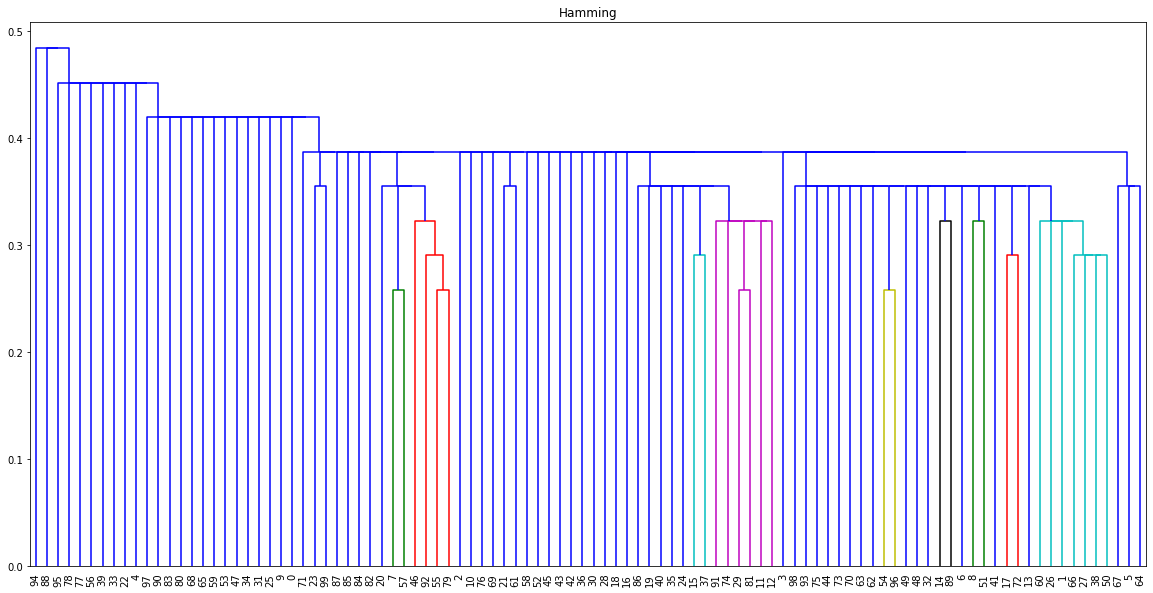

In [32]:
Z = hierarchy.linkage(distances, 'single')
plt.figure()
fig, axes = plt.subplots( figsize=(20, 10))
R=dendrogram(Z, orientation="top",truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
axes.set_title("Hamming")
plt.show()

<Figure size 432x288 with 0 Axes>

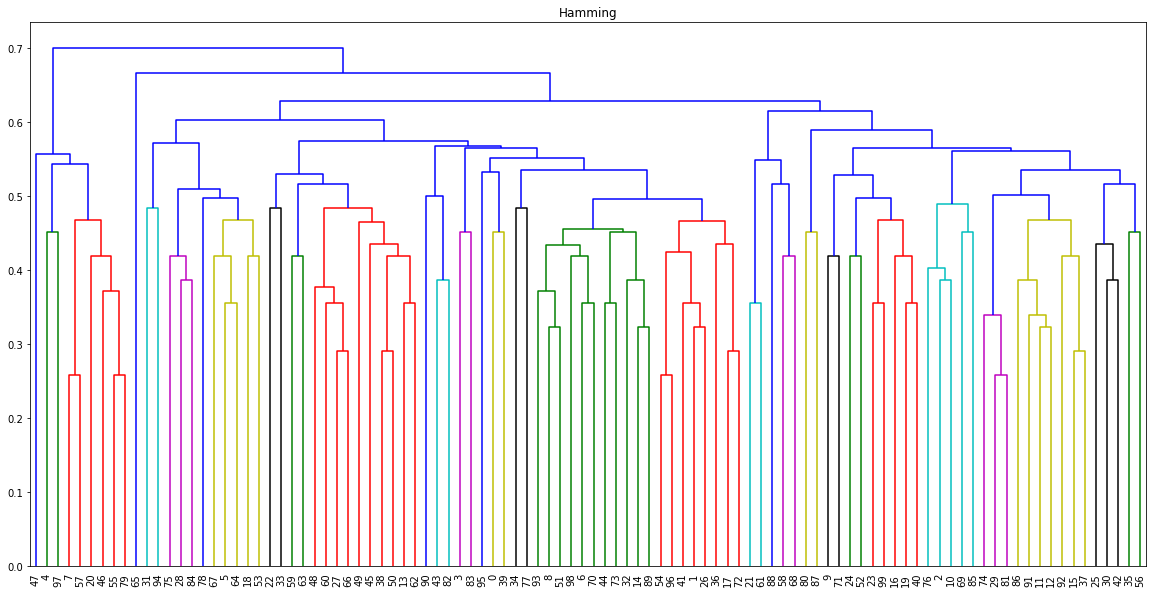

In [33]:
Z = hierarchy.linkage(distances, 'average')
plt.figure()
fig, axes = plt.subplots( figsize=(20, 10))
R=dendrogram(Z, orientation="top",truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
axes.set_title("Hamming")
plt.show()

<Figure size 432x288 with 0 Axes>

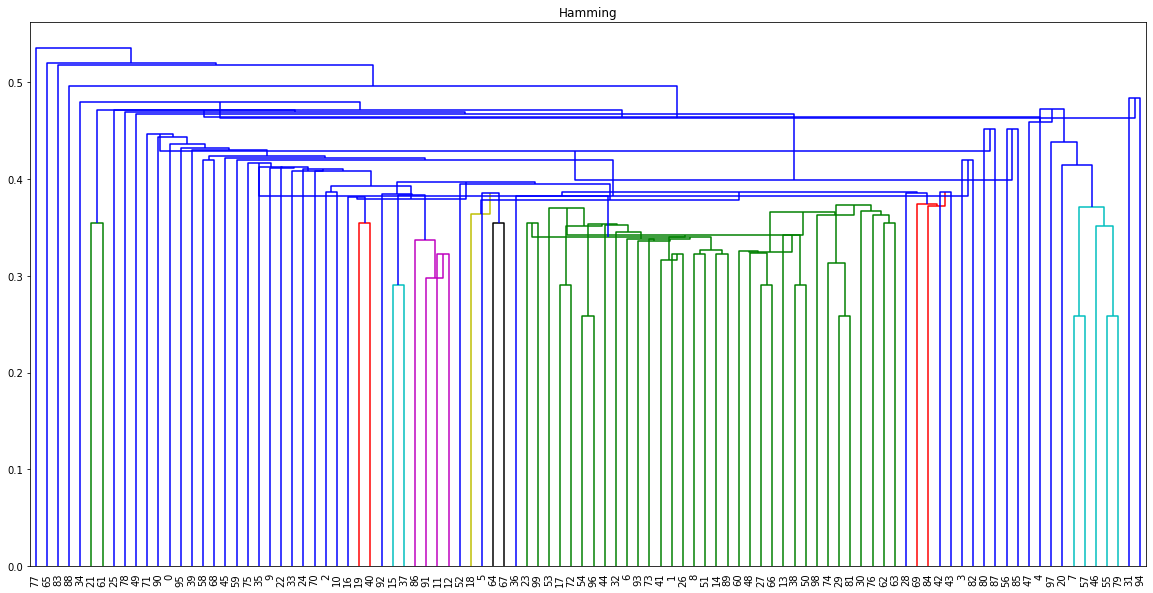

In [34]:
Z = hierarchy.linkage(distances, 'centroid')
plt.figure()
fig, axes = plt.subplots( figsize=(20, 10))
R=dendrogram(Z, orientation="top",truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
axes.set_title("Hamming")
plt.show()

<Figure size 432x288 with 0 Axes>

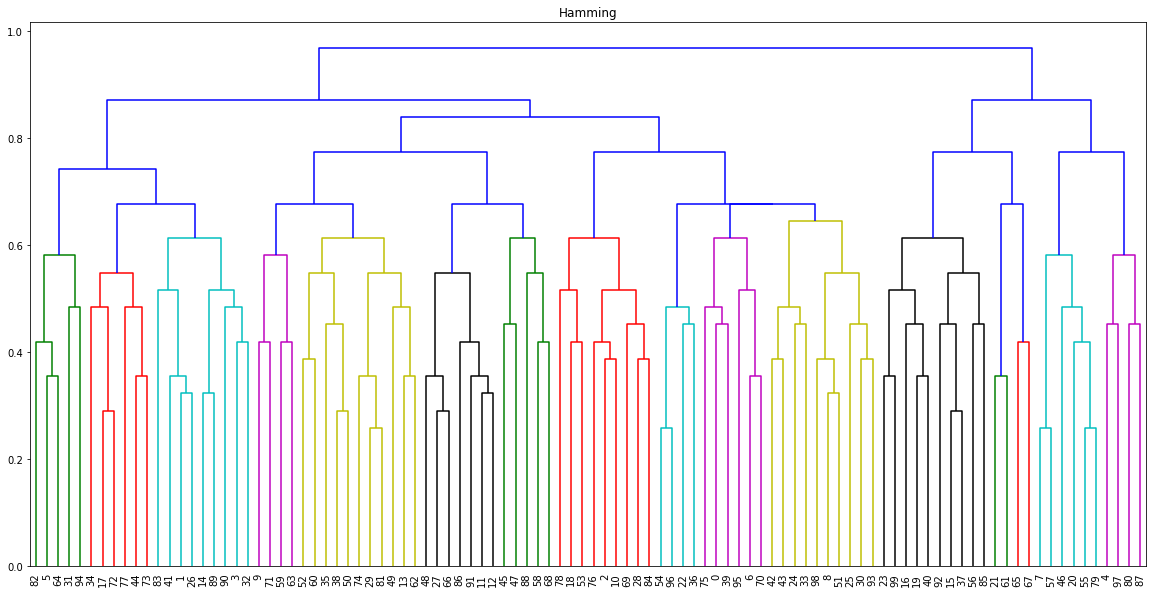

In [35]:
Z = hierarchy.linkage(distances, 'complete')
plt.figure()
fig, axes = plt.subplots( figsize=(20, 10))
R=dendrogram(Z, orientation="top",truncate_mode='lastp', p=100, leaf_font_size=10.,no_plot=False)
axes.set_title("Hamming")
plt.show()

In [15]:
def electrodometicToNumber(x):
    if x ==  1:
        return 0
    if x ==  2:
        return 10
    if x ==  3:
        return 1000
    if x ==  4:
        return 1001
    if x ==  5:
        return 1010
    if x ==  6:
        return 1100
    if x ==  7:
        return 10000
    if x ==  8:
        return 10001
    if x ==  9:
        return 10010
    if x == 10:
        return 10011 
    if x == 11:
        return 10100 
    if x == 12:
        return 10110 
    if x == 13:
        return 11000 
    if x == 14:
        return 11001 
    if x == 15:
        return 11010 
    if x == 16:
        return 11011 
    if x == 17:
        return 11100 
    if x == 18:
        return 11101 
    if x == 19:
        return 11110 
    if x == 20:
        return 11111 
    else:
        return x
    
def generoToNumber(x):
    if x == 0:
        return 'F'
    if x == 1:
        return 'M'
    else:
        return x
    
def departamentoToNumber(x):
    if x ==  1 :
        return "AMAZONAS"
    if x ==  2 :
        return "ANTIOQUIA"
    if x ==  3 :
        return "ARAUCA"
    if x ==  4 :
        return "ATLANTICO"
    if x ==  5 :
        return "BOGOTA"
    if x ==  6 :
        return "BOLIVAR"
    if x ==  7 :
        return "BOYACA"
    if x ==  8 :
        return "CALDAS"
    if x ==  9 :
        return "CAQUETA"
    if x ==  10 :
        return "CASANARE"
    if x ==  11 :
        return "CAUCA"
    if x ==  12 :
        return "CESAR"
    if x ==  13 :
        return "CHOCO" 
    if x ==  14 :
        return "CORDOBA"
    if x ==  15 :
        return "CUNDINAMARCA"
    if x ==  16 :
        return "GUAINIA"
    if x ==  17 :
        return "GUAVIARE"
    if x ==  18 :
        return "HUILA"
    if x ==  19 :
        return  "LA GUAJIRA"
    if x ==  20 :
        return "MAGDALENA"
    if x ==  21 :
        return "META"
    if x ==  22 :
        return "NARIÑO"
    if x ==  23:
        return "NORTE SANTANDER"
    if x ==  24 :
        return "PUTUMAYO"
    if x ==  25 :
        return "QUINDIO"
    if x ==  26 :
        return "RISARALDA"
    if x ==   27:
        return "SAN ANDRES"
    if x ==  28 :
        return "SANTANDER"
    if x ==  29 :
        return "SUCRE"
    if x ==  30 :
        return "TOLIMA"
    if x ==  31 :
        return "VALLE"
    if x ==  32 :
        return "VAUPES"
    if x ==  33 :
        return "VICHADA"
    if x == 0 :
        return "EXTRANJERO"
    
def estratoToNumber(x):
    if x ==  1:
        return "Estrato 1"
    if x ==  2:
        return "Estrato 2"
    if x ==  3:
        return "Estrato 3"
    if x ==  4:
        return "Estrato 4"
    if x ==  5:
        return "Estrato 5"
    if x ==  6:
        return "Estrato 6"
    if x == 0:
        return "Sin Estrato"

def personasHogarToNumber(x):
    if x ==  1:
        return "1 a 2"
    if x ==  3:
        return "3 a 4"
    if x ==  5:
        return "5 a 6"
    if x ==  7:
        return "7 a 8"
    if x ==  9:
        return "9 o más"
    
def cuartosToNumber(x):
    if x ==  5:
        return "Cinco"
    if x ==  4:
        return "Cuatro"
    if x ==  2:
        return "Dos"
    if x == 6:
        return "Seis o mas" 
    if x ==  3:
        return "Tres"
    if x ==  1:
        return "Uno"
    
def educacionToNumber(x):
    if x == 1:
        return "Educación profesional completa"
    if x == 2:
        return "Educación profesional incompleta"
    if x == 3:
        return "Ninguno"
    if x == 4:
        return "No Aplica"
    if x == 5:
        return "No sabe"
    if x == 6:
        return "Postgrado"
    if x == "7:
        return "Primaria completa"
    if x == 8:
        return "Primaria incompleta"
    if x == 9:
        return "Secundaria (Bachillerato) completa"
    if x == 10:
        return "Secundaria (Bachillerato) incompleta"
    if x == 11:
        return "Técnica o tecnológica completa"
    if x == 12:
        return "Técnica o tecnológica incompleta"
    else:
        return x

def trabajoMadreToNumber(x):    
    if x == 1:
        return "Es agricultor, pesquero o jornalero"
    if x == 2:
        return "Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial"
    if x == 3:
        return "Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc"
    if x == 4:
        return "Es operario de máquinas o conduce vehículos (taxita, chofer)"
    if x == 5:
        return "Es vendedor o trabaja en atención al público"
    if x == 6:
        return "No aplica"
    if x == 7:
        return "No sabe"
    if x == 8:
        return "Pensionado"
    if x == 9:
        return "Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)"
    if x == 10:
        return "Trabaja como personal de limpieza, mantenimiento, seguridad o construcción"
    if x == 11:
        return "Trabaja como profesional (por ejemplo médico, abogado, ingeniero)"
    if x == 12:
        return "Trabaja en el hogar, no trabaja o estudia"
    if x == 13:
        return "Trabaja por cuenta propia (por ejemplo plomero, electricista)"
    else:
        return -1
    



def numLibrosToNumber(x):
    if x == 1:
        return "0 A 10 LIBROS" 
    if x == 2:
        return "11 A 25 LIBROS" 
    if x == 3:
        return "26 A 100 LIBROS" 
    if x == 4:
        return "MÁS DE 100 LIBROS" 
    
def foodToNumber(x):
    if x == 1:
        return "1 o 2 veces por semana" 
    if x == 2:
        return "3 a 5 veces por semana" 
    if x == 3:
        return "Nunca o rara vez comemos eso" 
    if x == 4:
        return "Todos o casi todos los días" 
     
def lectureToNumber(x):
    if x == 1:
        return "30 minutos o menos" 
    if x == 2:
        return "Entre 1 y 2 horas" 
    if x == 3:
        return "Entre 30 y 60 minutos" 
    if x == 4:
        return "Más de 2 horas" 
    if x == 5:
        return "No leo por entretenimiento" 
    
def internetToNumber(x):
    if x == 1:
        return "30 minutos o menos" 
    if x == 2:
        return "Entre 1 y 3 horas" 
    if x == 3:
        return "Entre 30 y 60 minutos" 
    if x == 4:
        return "Más de 3 horas" 
    if x == 5:
        return "No Navega Internet" 
   
def coleNaturaleza(x):
    if x == 1:
        return "NO OFICIAL"
    if x == 2:
        return "OFICIAL"
    
    
def coleCaracterToNumber(x):
    if x == 1:
        return "ACADÉMICO" 
    if x == 2:
        return "NO APLICA" 
    if x == 3:
        return "TÉCNICO" 
    if x == 4:
        return "TÉCNICO/ACADÉMICO" 

    
def areaToNumber(x):
    if x == 1:
        return "RURAL"
    if x == 2:
        return "URBANO"
    
def jornadaToNumber(x):
    if x == 1:
        return "COMPLETA" 
    if x == 2:
        return "MAÑANA" 
    if x == 3:
        return "NOCHE" 
    if x == 4:
        return "SABATINA" 
    if x == 5:
        return "TARDE" 
    if x == 6:
        return "UNICA" 
    
def puntajeCategorico(x):
    x=int(x)
    if x<=10:
        return 1
    elif x<=20:
        return 2
    elif x<=30:
        return 3
    elif x<=40:
        return 4
    elif x<=50:
        return 5
    elif x<=60:
        return 6
    elif x<=70:
        return 7
    elif x<=80:
        return 8
    elif x<=90:
        return 9
    else:
        return 10
    
 
def puntajeGlobalCategorico(x):
    x=int(x)
    if x<=50:
        return 1
    elif x<=100:
        return 2
    elif x<=150:
        return 3
    elif x<=200:
        return 4
    elif x<=250:
        return 5
    elif x<=300:
        return 6
    elif x<=350:
        return 7
    elif x<=400:
        return 8
    elif x<=450:
        return 9
    else:
        return 10

    
def inseIndividualCategorico(x):
    x=int(x)
    if x<=5:
        return 1
    elif x<=10:
        return 2
    elif x<=15:
        return 3
    elif x<=20:
        return 4
    elif x<=25:
        return 5
    elif x<=30:
        return 6
    elif x<=35:
        return 7
    elif x<=40:
        return 8
    elif x<=45:
        return 9
    elif x<=50:
        return 10
    elif x<=55:
        return 11
    elif x<=60:
        return 12
    elif x<=65:
        return 13
    elif x<=70:
        return 14
    elif x<=75:
        return 15
    elif x<=80:
        return 16
    elif x<=85:
        return 17
    elif x<=90:
        return 18
    elif x<=95:
        return 19
    else:
        return 20


def nseIndividualToNumber(x):
    if x == "NSE1":
        return 1
    if x == "NSE2":
        return 2
    if x == "NSE3":
        return 3
    if x == "NSE4":
        return 4
 


    


In [ ]:
for centroid in kmtmp.cluster_centroids_:
    for i in range(len(columns)):
        print(columns[i],":",list(centroid)[i])
    print("..........................")

In [ ]:
ELECTRODOMESTICOS : 13
ESTU_GENERO : 1
ESTU_FECHANACIMIENTO : 16
PERIODO : 20172
ESTU_DEPTO_RESIDE : 5
FAMI_ESTRATOVIVIENDA : 2
FAMI_PERSONASHOGAR : 3
FAMI_CUARTOSHOGAR : 3
FAMI_EDUCACIONPADRE : 9
FAMI_EDUCACIONMADRE : 9
FAMI_TRABAJOLABORPADRE : 4
FAMI_TRABAJOLABORMADRE : 12
FAMI_NUMLIBROS : 2
FAMI_COMELECHEDERIVADOS : 4
FAMI_COMECARNEPESCADOHUEVO : 4
FAMI_COMECEREALFRUTOSLEGUMBRE : 2
ESTU_DEDICACIONLECTURADIARIA : 3
ESTU_DEDICACIONINTERNET : 4
COLE_NATURALEZA : 2
COLE_CARACTER : 1
COLE_AREA_UBICACION : 2
COLE_JORNADA : 2
PUNT_LECTURA_CRITICA : 5
PUNT_MATEMATICAS : 5
PUNT_C_NATURALES : 5
PUNT_SOCIALES_CIUDADANAS : 5
PUNT_INGLES : 5
PUNT_GLOBAL : 5
ESTU_NSE_ESTABLECIMIENTO : 2
ESTU_INSE_INDIVIDUAL : 12
ESTU_NSE_INDIVIDUAL : 3

In [22]:
for centroid in kmtmp.cluster_centroids_:
    print("ELECTRODOMESTICOS :", electrodometicToNumber(centroid[0]))
    print("ESTU_GENERO :", generoToNumber(centroid[1]))
    print("ESTU_FECHANACIMIENTO :", centroid[2])
    print("PERIODO :", centroid[3])
    print("ESTU_DEPTO_RESIDE :", departamentoToNumber(centroid[4]))
    print("FAMI_ESTRATOVIVIENDA :", estratoToNumber(centroid[5]))
    print("FAMI_PERSONASHOGAR :", personasHogarToNumber(centroid[6]))
    print("FAMI_CUARTOSHOGAR :", cuartosToNumber(centroid[7]))
    print("FAMI_EDUCACIONPADRE :", educacionToNumber(centroid[8]))
    print("FAMI_EDUCACIONMADRE :", educacionToNumber(centroid[9]))
    print("FAMI_TRABAJOLABORPADRE :", trabajoMadreToNumber(centroid[10]))
    print("FAMI_TRABAJOLABORMADRE :", trabajoMadreToNumber(centroid[11]))
    print("FAMI_NUMLIBROS :", numLibrosToNumber(centroid[12]))
    print("FAMI_COMELECHEDERIVADOS :", foodToNumber(centroid[13]))
    print("FAMI_COMECARNEPESCADOHUEVO :", foodToNumber(centroid[14]))
    print("FAMI_COMECEREALFRUTOSLEGUMBRE :", foodToNumber(centroid[15]))
    print("ESTU_DEDICACIONLECTURADIARIA :", lectureToNumber(centroid[16]))
    print("ESTU_DEDICACIONINTERNET :", internetToNumber(centroid[17]))
    print("COLE_NATURALEZA :", coleNaturaleza(centroid[18]))
    print("COLE_CARACTER :", coleCaracterToNumber(centroid[19]))
    print("COLE_AREA_UBICACION :", areaToNumber(centroid[20]))
    print("COLE_JORNADA :", jornadaToNumber(centroid[21]))
    print("PUNT_LECTURA_CRITICA :", centroid[22])
    print("PUNT_MATEMATICAS :", centroid[23])
    print("PUNT_C_NATURALES :", centroid[24])
    print("PUNT_SOCIALES_CIUDADANAS :", centroid[25])
    print("PUNT_INGLES :", centroid[26])
    print("PUNT_GLOBAL :", centroid[27])
    print("ESTU_NSE_ESTABLECIMIENTO :", centroid[28])
    print("ESTU_INSE_INDIVIDUAL :", centroid[29])
    print("ESTU_NSE_INDIVIDUAL :", nseIndividualToNumber(centroid[30]))
    print("----------------------------------------------------")

ELECTRODOMESTICOS : 11000
ESTU_GENERO : M
ESTU_FECHANACIMIENTO : 16
PERIODO : 20172
ESTU_DEPTO_RESIDE : BOGOTA
FAMI_ESTRATOVIVIENDA : Estrato 2
FAMI_PERSONASHOGAR : 3 a 4
FAMI_CUARTOSHOGAR : Tres
FAMI_EDUCACIONPADRE : Secundaria (Bachillerato) completa
FAMI_EDUCACIONMADRE : Secundaria (Bachillerato) completa
FAMI_TRABAJOLABORPADRE : Es operario de máquinas o conduce vehículos (taxita, chofer)
FAMI_TRABAJOLABORMADRE : Trabaja en el hogar, no trabaja o estudia
FAMI_NUMLIBROS : 11 A 25 LIBROS
FAMI_COMELECHEDERIVADOS : Todos o casi todos los días
FAMI_COMECARNEPESCADOHUEVO : Todos o casi todos los días
FAMI_COMECEREALFRUTOSLEGUMBRE : 3 a 5 veces por semana
ESTU_DEDICACIONLECTURADIARIA : Entre 30 y 60 minutos
ESTU_DEDICACIONINTERNET : Más de 3 horas
COLE_NATURALEZA : OFICIAL
COLE_CARACTER : ACADÉMICO
COLE_AREA_UBICACION : URBANO
COLE_JORNADA : MAÑANA
PUNT_LECTURA_CRITICA : 5
PUNT_MATEMATICAS : 5
PUNT_C_NATURALES : 5
PUNT_SOCIALES_CIUDADANAS : 5
PUNT_INGLES : 5
PUNT_GLOBAL : 5
ESTU_NSE_ESTAB

In [ ]:
def electrodometicToNumber(x):
    if x == 0:
        return 1
    if x == 10:
        return 2
    if x == 1000:
        return 3
    if x == 1001:
        return 4
    if x == 1010:
        return 5
    if x == 1100:
        return 6
    if x == 10000:
        return 7
    if x == 10001:
        return 8
    if x == 10010:
        return 9
    if x == 10011:
        return 10
    if x == 10100:
        return 11
    if x == 10110:
        return 12
    if x == 11000:
        return 13
    if x == 11001:
        return 14
    if x == 11010:
        return 15
    if x == 11011:
        return 16
    if x == 11100:
        return 17
    if x == 11101:
        return 18
    if x == 11110:
        return 19
    if x == 11111:
        return 20
    else:
        return x
    
def generoToNumber(x):
    if x == 'F':
        return 0
    if x == 'M':
        return 1
    else:
        return x
    
def departamentoToNumber(x):
    if x == "AMAZONAS":
        return 1
    if x == "ANTIOQUIA":
        return 2
    if x == "ARAUCA":
        return 3
    if x == "ATLANTICO":
        return 4
    if x == "BOGOTA":
        return 5
    if x == "BOLIVAR":
        return 6
    if x == "BOYACA":
        return 7
    if x == "CALDAS":
        return 8
    if x == "CAQUETA":
        return 9
    if x == "CASANARE":
        return 10
    if x == "CAUCA":
        return 11
    if x == "CESAR":
        return 12
    if x == "CHOCO":
        return 13
    if x == "CORDOBA":
        return 14
    if x == "CUNDINAMARCA":
        return 15
    if x == "GUAINIA":
        return 16
    if x == "GUAVIARE":
        return 17
    if x == "HUILA":
        return 18
    if x == "LA GUAJIRA":
        return 19
    if x == "MAGDALENA":
        return 20
    if x == "META":
        return 21
    if x == "NARIÑO":
        return 22
    if x == "NORTE SANTANDER":
        return 23
    if x == "PUTUMAYO":
        return 24
    if x == "QUINDIO":
        return 25
    if x == "RISARALDA":
        return 26
    if x == "SAN ANDRES":
        return 27
    if x == "SANTANDER":
        return 28
    if x == "SUCRE":
        return 29
    if x == "TOLIMA":
        return 30
    if x == "VALLE":
        return 31
    if x == "VAUPES":
        return 32
    if x == "VICHADA":
        return 33
    if x == "EXTRANJERO":
        return 0
    else:
        return x
    
def estratoToNumber(x):
    if x == "Estrato 1":
        return 1
    if x == "Estrato 2":
        return 2
    if x == "Estrato 3":
        return 3
    if x == "Estrato 4":
        return 4
    if x == "Estrato 5":
        return 5
    if x == "Estrato 6":
        return 6
    if x == "Sin Estrato":
        return 0

def personasHogarToNumber(x):
    if x == "1 a 2":
        return 1
    if x == "3 a 4":
        return 3
    if x == "5 a 6":
        return 5
    if x == "7 a 8":
        return 7
    if x == "9 o más":
        return 9
    
def cuartosToNumber(x):
    if x == "Cinco":
        return 5
    if x == "Cuatro":
        return 4
    if x == "Dos":
        return 2
    if x == "Seis o mas":
        return 6
    if x == "Tres":
        return 3
    if x == "Uno":
        return 1
    
def educacionToNumber(x):

    if x == "Educación profesional completa":
        return 1
    if x == "Educación profesional incompleta":
        return 2
    if x == "Ninguno":
        return 3
    if x == "No Aplica":
        return 4
    if x == "No sabe":
        return 5
    if x == "Postgrado":
        return 6
    if x == "Primaria completa":
        return 7
    if x == "Primaria incompleta":
        return 8
    if x == "Secundaria (Bachillerato) completa":
        return 9
    if x == "Secundaria (Bachillerato) incompleta":
        return 10
    if x == "Técnica o tecnológica completa":
        return 11
    if x == "Técnica o tecnológica incompleta":
        return 12
    else:
        return x

def trabajoMadreToNumber(x):    
    if x == "Es agricultor, pesquero o jornalero":
        return 1
    if x == "Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial":
        return 2
    if x == "Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc":
        return 3
    if x == "Es operario de máquinas o conduce vehículos (taxita, chofer)":
        return 4
    if x == "Es vendedor o trabaja en atención al público":
        return 5
    if x == "No aplica":
        return 6
    if x == "No sabe":
        return 7
    if x == "Pensionado":
        return 8
    if x == "Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)":
        return 9
    if x == "Trabaja como personal de limpieza, mantenimiento, seguridad o construcción":
        return 10
    if x == "Trabaja como profesional (por ejemplo médico, abogado, ingeniero)":
        return 11
    if x == "Trabaja en el hogar, no trabaja o estudia":
        return 12
    if x == "Trabaja por cuenta propia (por ejemplo plomero, electricista)":
        return 13
    else:
        return -1

def numLibrosToNumber(x):
    if x == "0 A 10 LIBROS":
        return 1
    if x == "11 A 25 LIBROS":
        return 2
    if x == "26 A 100 LIBROS":
        return 3
    if x == "MÁS DE 100 LIBROS":
        return 4
    
def foodToNumber(x):
    if x == "1 o 2 veces por semana":
        return 1
    if x == "3 a 5 veces por semana":
        return 2
    if x == "Nunca o rara vez comemos eso":
        return 3
    if x == "Todos o casi todos los días":
        return 4
     
def lectureToNumber(x):
    if x == "30 minutos o menos":
        return 1
    if x == "Entre 1 y 2 horas":
        return 2
    if x == "Entre 30 y 60 minutos":
        return 3
    if x == "Más de 2 horas":
        return 4
    if x == "No leo por entretenimiento":
        return 5
    
def internetToNumber(x):
    if x == "30 minutos o menos":
        return 1
    if x == "Entre 1 y 3 horas":
        return 2
    if x == "Entre 30 y 60 minutos":
        return 3
    if x == "Más de 3 horas":
        return 4
    if x == "No Navega Internet":
        return 5
   
def coleNaturaleza(x):
    if x == "NO OFICIAL":
        return 1
    if x == "OFICIAL":
        return 2
    
    
def coleCaracterToNumber(x):
    if x == "ACADÉMICO":
        return 1
    if x == "NO APLICA":
        return 2
    if x == "TÉCNICO":
        return 3
    if x == "TÉCNICO/ACADÉMICO":
        return 4

    
def areaToNumber(x):
    if x == "RURAL":
        return 1
    if x == "URBANO":
        return 2
    
def jornadaToNumber(x):
    if x == "COMPLETA":
        return 1
    if x == "MAÑANA":
        return 2
    if x == "NOCHE":
        return 3
    if x == "SABATINA":
        return 4
    if x == "TARDE":
        return 5
    if x == "UNICA":
        return 6
    
def puntajeCategorico(x):
    x=int(x)
    if x<=10:
        return 1
    elif x<=20:
        return 2
    elif x<=30:
        return 3
    elif x<=40:
        return 4
    elif x<=50:
        return 5
    elif x<=60:
        return 6
    elif x<=70:
        return 7
    elif x<=80:
        return 8
    elif x<=90:
        return 9
    else:
        return 10
    
 
def puntajeGlobalCategorico(x):
    x=int(x)
    if x<=50:
        return 1
    elif x<=100:
        return 2
    elif x<=150:
        return 3
    elif x<=200:
        return 4
    elif x<=250:
        return 5
    elif x<=300:
        return 6
    elif x<=350:
        return 7
    elif x<=400:
        return 8
    elif x<=450:
        return 9
    else:
        return 10

    
def inseIndividualCategorico(x):
    x=int(x)
    if x<=5:
        return 1
    elif x<=10:
        return 2
    elif x<=15:
        return 3
    elif x<=20:
        return 4
    elif x<=25:
        return 5
    elif x<=30:
        return 6
    elif x<=35:
        return 7
    elif x<=40:
        return 8
    elif x<=45:
        return 9
    elif x<=50:
        return 10
    elif x<=55:
        return 11
    elif x<=60:
        return 12
    elif x<=65:
        return 13
    elif x<=70:
        return 14
    elif x<=75:
        return 15
    elif x<=80:
        return 16
    elif x<=85:
        return 17
    elif x<=90:
        return 18
    elif x<=95:
        return 19
    else:
        return 20


def nseIndividualToNumber(x):
    if x == "NSE1":
        return 1
    if x == "NSE2":
        return 2
    if x == "NSE3":
        return 3
    if x == "NSE4":
        return 4